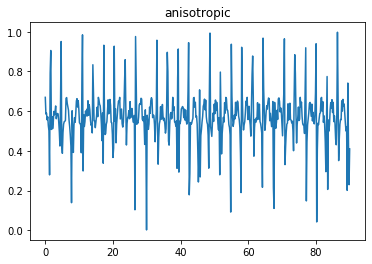

In [44]:
%matplotlib inline


"""Transfer matrix example.

Solve for both an isotropic and anisotropic multilayer.
"""
from builtins import range

import numpy
import pylab

import EMpy

n = scipy.array([1., 1.2, 10])
d = scipy.array([numpy.inf, 200e-9, numpy.inf])

iso_layers = EMpy.utils.Multilayer()
aniso_layers = EMpy.utils.Multilayer()
for i in range(n.size):
    aniso_layers.append(EMpy.utils.Layer(EMpy.materials.AnisotropicMaterial(
        'Air',
        epsilon_tensor=EMpy.materials.EpsilonTensor(
            epsilon_tensor_const=n[i] ** 2 * EMpy.constants.eps0 * numpy.eye(3))),d[i]))
theta_array = numpy.linspace(90,0,500)
#print(EMpy.utils.deg2rad(theta_array))

theta_inc = EMpy.utils.deg2rad(10.)
theta_inc_x = theta_inc
theta_inc_y = 0.
wls = [4e-9]#scipy.linspace(1.4e-6, 1.7e-6, 100)
solution_aniso = numpy.zeros(numpy.size(theta_array))
for j in range(theta_array.size):
    solution_aniso[j] = EMpy.transfer_matrix.AnisotropicTransferMatrix(aniso_layers,theta_array[j],theta_inc_y).solve(wls).R[1,1,:] 
    
#print( EMpy.transfer_matrix.AnisotropicTransferMatrix(aniso_layers, theta_inc_x, theta_inc_y).solve(wls))

pylab.figure()
pylab.plot(theta_array,solution_aniso)
#pylab.plot(wls, solution_aniso.R[0, 0, :], wls, solution_aniso.R[1, 0, :],
#           wls, solution_aniso.R[0, 1, :], wls, solution_aniso.R[1, 1, :],
#           wls, solution_aniso.T[0, 0, :], wls, solution_aniso.T[1, 0, :],
#           wls, solution_aniso.T[0, 1, :], wls, solution_aniso.T[1, 1, :])
pylab.title('anisotropic')
pylab.show()

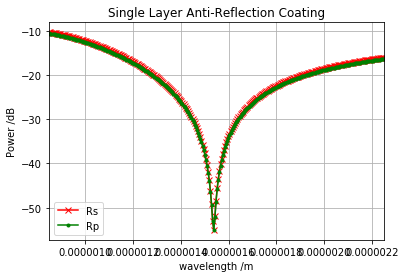

In [5]:
# taken from http://hyperphysics.phy-astr.gsu.edu/hbase/phyopt/antiref.html#c1

import numpy
import pylab

import EMpy

# define multilayer
n = numpy.array([1., 1.38, 1.9044])
d = numpy.array([numpy.inf, 387.5e-9 / 1.38, numpy.inf])
iso_layers = EMpy.utils.Multilayer()
for i in range(n.size):
    n0 = EMpy.materials.RefractiveIndex(n[i])
    iso_layers.append(
        EMpy.utils.Layer(EMpy.materials.IsotropicMaterial('mat', n0=n0), d[i]))

# define incident wave plane
theta_inc = EMpy.utils.deg2rad(10.)
wls = numpy.linspace(0.85e-6, 2.25e-6, 300)

# solve
tm = EMpy.transfer_matrix.IsotropicTransferMatrix(iso_layers, theta_inc)
solution_iso = tm.solve(wls)

# plot
pylab.figure()
pylab.plot(wls, 10 * numpy.log10(solution_iso.Rs), 'rx-',
           wls, 10*numpy.log10(solution_iso.Rp), 'g.-')
pylab.legend(('Rs', 'Rp'))
pylab.title('Single Layer Anti-Reflection Coating')
pylab.xlabel('wavelength /m')
pylab.ylabel('Power /dB')
pylab.grid()
pylab.xlim(wls.min(), wls.max())
pylab.show()


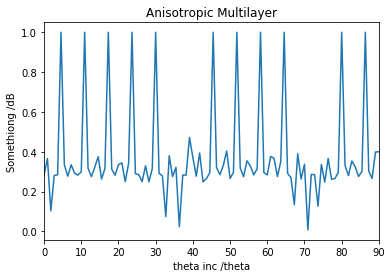

In [50]:

# define the multilayer

test=numpy.arange(9).reshape((3,3)) / 10 ##Test a non-diagonal matrix element

epsilon = [1.0 ** 2 * EMpy.constants.eps0 * numpy.eye(3),
           EMpy.constants.eps0 * numpy.diag([10, 2, 2]),
           3.0 ** 2 * EMpy.constants.eps0 * numpy.eye(3)]
##numpy.diag([2.1, 2.0, 1.9])
d = numpy.array([numpy.inf, 2.3, numpy.inf])

aniso_layers = EMpy.utils.Multilayer()
for i in range(len(epsilon)):
    eps = EMpy.materials.EpsilonTensor(epsilon[i] * numpy.eye(3))
    mat = EMpy.materials.AnisotropicMaterial('layer_%d' % i, eps)
    layer = EMpy.utils.Layer(mat, d[i])
    aniso_layers.append(layer)
#print(aniso_layers)
# define the planewave
theta_array = numpy.linspace(0,90,100)
theta_inc_x = EMpy.utils.deg2rad(0)
theta_inc_y = EMpy.utils.deg2rad(10)
wls = [2E-9] # numpy.linspace(1, 2, 20)
#print(epsilon[1])
# solve
Reflect = numpy.zeros(len(theta_array))
for j in range(len(theta_array)):
    tm = EMpy.transfer_matrix.AnisotropicTransferMatrix(aniso_layers, theta_array[j], theta_inc_y)
    solution_aniso = tm.solve(wls)
    Reflect[j] = solution_aniso.R[0,0,:]
    
#tm = EMpy.transfer_matrix.AnisotropicTransferMatrix(aniso_layers, theta_inc_x, theta_inc_y)
#solution_aniso = tm.solve(wls)

# plot

pylab.figure()
pylab.plot(theta_array,Reflect)
#pylab.plot(wls, solution_aniso.R[0, 0, :],
#           wls, solution_aniso.R[1, 0, :],
#           wls, solution_aniso.R[0, 1, :],
#           wls, solution_aniso.R[1, 1, :],)
#pylab.legend(('Rss', 'Rps', 'Rsp', 'Rpp'))
pylab.title('Anisotropic Multilayer')
pylab.xlabel('theta inc /theta')
pylab.ylabel('Somethiong /dB')
pylab.xlim(theta_array.min(), theta_array.max())
pylab.show()



In [ ]:
# define the multilayer
epsilon = [1.0 ** 2 * EMpy.constants.eps0 * numpy.eye(3),
           EMpy.constants.eps0 * numpy.diag([2.1, 2.0, 1.9]),
           2.3 ** 2 * EMpy.constants.eps0 * numpy.eye(3),
           4.3 ** 2 * EMpy.constants.eps0 * numpy.eye(3),
           3.0 ** 2 * EMpy.constants.eps0 * numpy.eye(3)]

d = numpy.array([numpy.inf, 1e-6, 2.3e-6, 0.1e-6, numpy.inf])

In [31]:
test=numpy.arange(9).reshape((3,3)) / 10
print(test)

[[0.  0.1 0.2]
 [0.3 0.4 0.5]
 [0.6 0.7 0.8]]
